In [210]:
import matplotlib.pylab as plt
from scipy.stats import norm
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

In [211]:
df = pd.read_csv('iris.data')
X = df.iloc[:,0:4]
Y = df.iloc[:,4]

In [212]:
def target_converter(Lable):
    A = []
    class_list = []
    output = []
    x = 0

    for i in Lable:
        if (i not in A):
            A.append(i)
            class_list.append(x)
            x += 1
        
    for i in Lable:
        x = A.index(i)
        output.append(x)
        
    return(class_list,np.array(output))

In [213]:
X = np.array(X)
class_list, Y = target_converter(np.array(Y))

In [214]:
def prior_list_generator(class_list,X):
    prior_list = []
    for i in class_list:
        xyi = X[Y == i]
        prior = len(xyi)/len(X)
        prior_list.append(prior)
    return prior_list

In [215]:
Prior = prior_list_generator(class_list,X)

In [216]:
def fit_dist(data):
    mu = mean(data)
    sigma = std(data)
    out_dist = norm(mu,sigma)
    return out_dist

In [217]:
def likelihood(X,Y,class_list):
    likelihood_list = []
    for i in class_list:
        xyi = X[Y == i]
        likelihood = []
        for j in range(len(X[0])):
            like_xj_yi = fit_dist(xyi[:,j])
            likelihood.append(like_xj_yi)
        likelihood_list.append(likelihood)
    return likelihood_list

In [218]:
Likelihood = likelihood(X,Y,class_list)

In [219]:
def probability(sample, prior, likelihood):
    Likelihood = 1
    for i in range(len(likelihood)):
        Likelihood = Likelihood * likelihood[i].pdf(sample[i])
    posterior = Likelihood * prior
    return posterior

In [220]:
def calc_prob(likelihood_list,prior_list,xsample,ysample):
    pred_list = []
    for likelihood,prior in zip(likelihood_list,prior_list):
        y_pred = probability( xsample, prior, likelihood)
        pred_list.append(y_pred)
    for i in range(len(pred_list)):
        if pred_list[i] == max(pred_list):
            prediction = i
    if prediction == ysample:
        return 1
    else:
        return 0

In [221]:
def accuracy_pred(X_sample,Y_sample,Likelihood,Prior):
    accuracy_list = []
    accurate_pred = 0
    for i, j in zip(X_sample, Y_sample):
        accuracy = calc_prob(Likelihood,Prior,i,j)
        accuracy_list.append(accuracy)
    for i in accuracy_list:
        if i == 1:
            accurate_pred += 1
    return accurate_pred/len(accuracy_list)


In [222]:
accuracy_list = []
sampling_size = []
def naive_bayes_classification(sample_percent):
    sample_size = int(sample_percent* len(X))
    acc = accuracy_pred(X[0:sample_size],Y[0:sample_size],Likelihood,Prior)
    sampling_size.append(sample_percent)
    accuracy_list.append(acc)
    

10 10


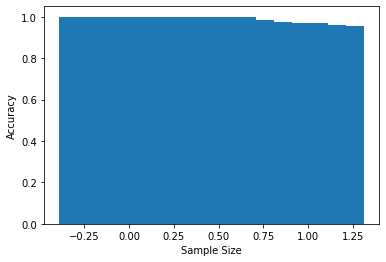

In [223]:
for i in range(1,100,10):
    naive_bayes_classification(i/100)
print(len(sampling_size),len(accuracy_list))
plt.bar(sampling_size,accuracy_list)
plt.xlabel("Sample Size")
plt.ylabel("Accuracy")
plt.show()


In [224]:
sampling_size

[0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91]